In [ ]:
#Source: https://towardsdatascience.com/traffic-sign-detection-using-convolutional-neural-network-660fb32fe90e

In [9]:
import os
import pandas as pd
import math
import numpy as np
import cv2
import keras
import seaborn as sns
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

Using TensorFlow backend.


In [0]:
def resize_cv(img):
    return cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)

In [10]:
data_dir = os.path.abspath('~/GTSRB/Final_Training/Images')
os.path.exists(data_dir)

False

In [0]:
### Plotting the dataset
fig = sns.distplot(output, kde=False, bins = 43, hist = True, hist_kws=dict(edgecolor="black", linewidth=2))
fig.set(title = "Traffic signs frequency graph",
        xlabel = "ClassId",
        ylabel = "Frequency")

In [0]:
input_array = np.stack(list_images)

train_y = keras.utils.np_utils.to_categorical(output)

In [0]:
### Randomizing the dataset
randomize = np.arange(len(input_array))
np.random.shuffle(randomize)
x = input_array[randomize]
y = train_y[randomize]

In [0]:
### Splitting the dataset in train, validation, test set
split_size = int(x.shape[0]*0.6)
train_x, val_x = x[:split_size], x[split_size:]
train1_y, val_y = y[:split_size], y[split_size:]

split_size = int(val_x.shape[0]*0.5)
val_x, test_x = val_x[:split_size], val_x[split_size:]
val_y, test_y = val_y[:split_size], val_y[split_size:]

### German dataset

In [15]:
import zipfile

zipref = zipfile.ZipFile('gtsrb-german-traffic-sign.zip', 'r') 
zipref.extractall()
zipref.close()
#!ls

gdrive			       meta  Meta.csv	  test	Test.csv  Train
gtsrb-german-traffic-sign.zip  Meta  sample_data  Test	train	  Train.csv


In [0]:
data=[]
labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width*channels

for i in range(classes) :
    path = "./train/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
Cells=np.array(data)
labels=np.array(labels)

#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [0]:
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hote encoding for the train and validation labels
from keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

In [0]:
#Definition of the DNN model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

Train on 31368 samples, validate on 7841 samples
Epoch 1/10
31368/31368 [==============================] - 132s 4ms/step - loss: 1.4256 - acc: 0.6005 - val_loss: 0.2229 - val_acc: 0.9346
Epoch 2/10
31368/31368 [==============================] - 132s 4ms/step - loss: 0.3315 - acc: 0.8970 - val_loss: 0.1076 - val_acc: 0.9671
Epoch 3/10
31368/31368 [==============================] - 132s 4ms/step - loss: 0.2189 - acc: 0.9327 - val_loss: 0.0718 - val_acc: 0.9790
Epoch 4/10
31368/31368 [==============================] - 132s 4ms/step - loss: 0.1696 - acc: 0.9486 - val_loss: 0.0559 - val_acc: 0.9847
Epoch 5/10
31368/31368 [==============================] - 131s 4ms/step - loss: 0.1470 - acc: 0.9563 - val_loss: 0.0410 - val_acc: 0.9876
Epoch 6/10
31368/31368 [==============================] - 132s 4ms/step - loss: 0.1284 - acc: 0.9605 - val_loss: 0.0369 - val_acc: 0.9895
Epoch 7/10
31368/31368 [==============================] - 132s 4ms/step - loss: 0.1125 - acc: 0.9646 - val_loss: 0.0527 - v

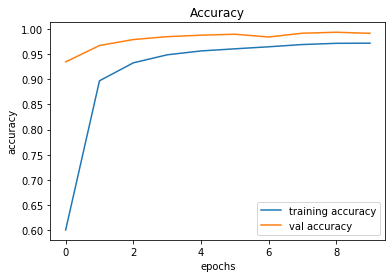

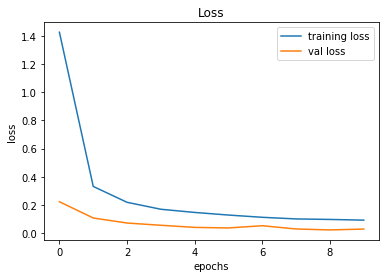

In [39]:
#using ten epochs for the training and saving the accuracy for each epoch
epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))

#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [43]:
#Predicting with the test data
y_test=pd.read_csv("./Test.csv")
labels=y_test['Path'].as_matrix()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('./test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test = np.array(data)
X_test = X_test.astype('float32')/255 
pred = model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [44]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9575613618368963

In [47]:
X_test.shape

(12630, 30, 30, 3)

In [50]:
pred.shape

(12630,)

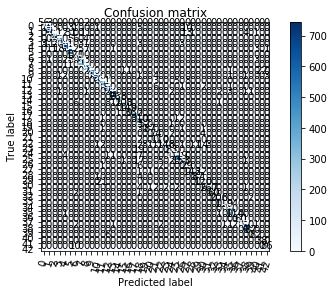

In [45]:
# Confussion matrix 
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=75) 
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = range(43)
cm = confusion_matrix(pred,y_test)

plt.figure(2)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

In [0]:
from keras.models import load_model

model.save('my_model.h5')